In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Prediction Insurance.csv")

In [3]:
df.head(10)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28,0,> 2 Years,Yes,40454,26,217,1
1,2,Male,76,1,3,0,1-2 Year,No,33536,26,183,0
2,3,Male,47,1,28,0,> 2 Years,Yes,38294,26,27,1
3,4,Male,21,1,11,1,< 1 Year,No,28619,152,203,0
4,5,Female,29,1,41,1,< 1 Year,No,27496,152,39,0
5,6,Female,24,1,33,0,< 1 Year,Yes,2630,160,176,0
6,7,Male,23,1,11,0,< 1 Year,Yes,23367,152,249,0
7,8,Female,56,1,28,0,1-2 Year,Yes,32031,26,72,1
8,9,Female,24,1,3,1,< 1 Year,No,27619,152,28,0
9,10,Female,32,1,6,1,< 1 Year,No,28771,152,80,0


# **Overview of Dataset**

In [4]:
# Dataset overview
result = []
for col in df.columns:
    result.append([col, df[col].dtype, df[col].isna().sum(), 100*df[col].isna().sum()/len(df[col]), df[col].nunique(), df[col].unique()[:5]])

output = pd.DataFrame(data=result, columns = 'column data_type no._null percent_null no._unique unique_sample'.split())
output

,column,data_type,no._null,percent_null,no._unique,unique_sample
0,id,int64,0,0.0,381109,"[1, 2, 3, 4, 5]"
1,Gender,object,0,0.0,2,"[Male, Female]"
2,Age,int64,0,0.0,66,"[44, 76, 47, 21, 29]"
3,Driving_License,int64,0,0.0,2,"[1, 0]"
4,Region_Code,int64,0,0.0,53,"[28, 3, 11, 41, 33]"
5,Previously_Insured,int64,0,0.0,2,"[0, 1]"
6,Vehicle_Age,object,0,0.0,3,"[> 2 Years, 1-2 Year, < 1 Year]"
7,Vehicle_Damage,object,0,0.0,2,"[Yes, No]"
8,Annual_Premium,int64,0,0.0,48838,"[40454, 33536, 38294, 28619, 27496]"
9,Policy_Sales_Channel,int64,0,0.0,155,"[26, 152, 160, 124, 14]"


## **Features Overview:**
**Categorical:**
- Gender
- Driving_License
- Region_Code
- Previously_Insured
- Vehicle_Age
- Vehicle_Damage
- Policy_Sales_Channel

**Numerical:**
- Age
- Anuual_Premium
- Vintage

**Identifier:**
- id

**Target:**
- Response


# **Data Preprocessing**

## **Checking for duplicates**

In [5]:
print(f'Dataset contains duplicated values: {df.duplicated().any()}')
print(f'Number of duplicates present in dataset: {df.duplicated().sum()}')

Dataset contains duplicated values: False
Number of duplicates present in dataset: 0


## **Looking at distribution of Numerical Features**

In [6]:
# Grouping Numerical & Categorical Features
nums = ['Age', 'Annual_Premium', 'Vintage']
cats = ['Gender', 'Driving_License', 'Region_Code', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Policy_Sales_Channel']

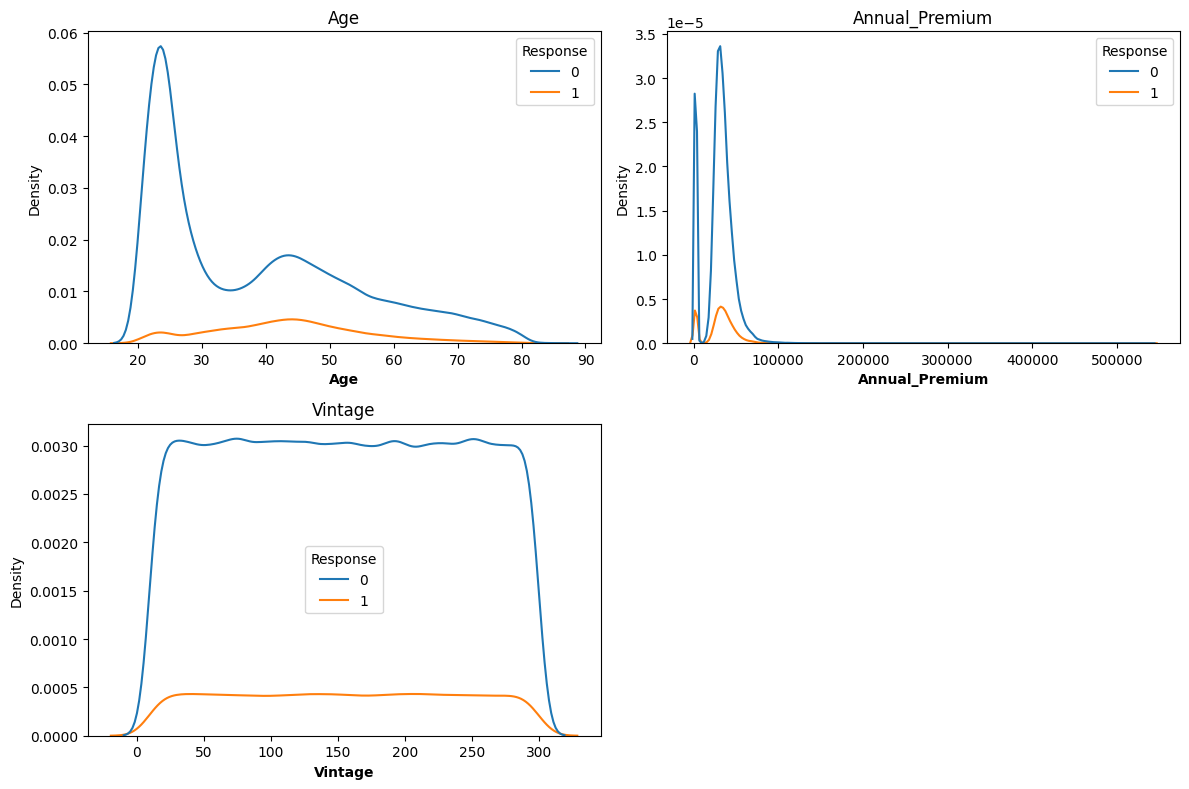

In [7]:
plt.figure(figsize = (12,8))
for i in range(len(nums)):
    plt.subplot(2, 2, i+1)
    sns.kdeplot(x=nums[i], hue='Response', data=df)
    plt.xlabel(nums[i], fontsize=10, fontweight = 'bold')
    plt.title(f'{nums[i]}')
    plt.tight_layout()

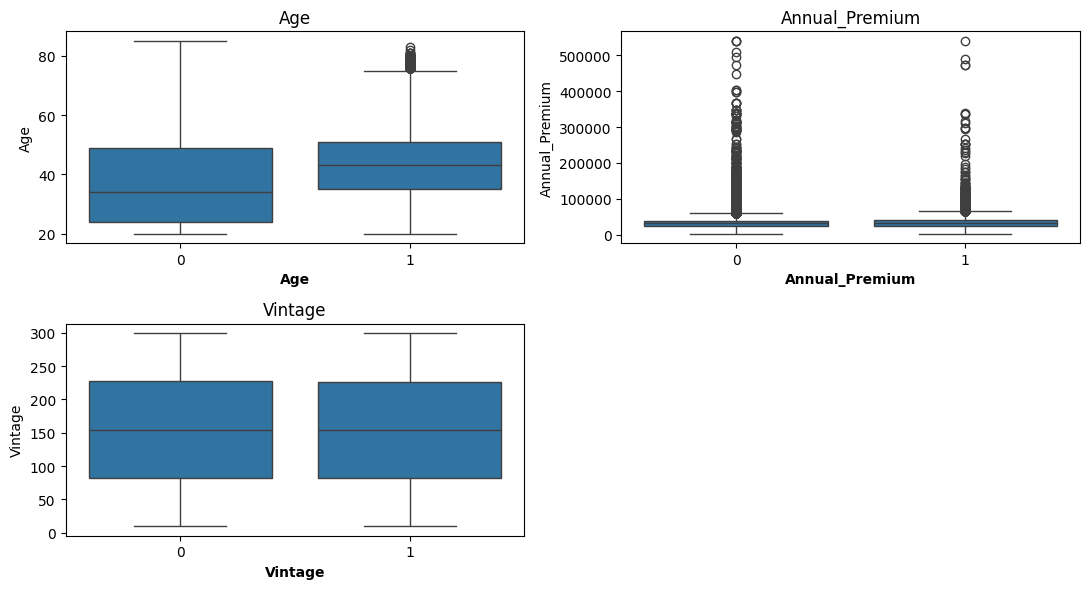

In [8]:
plt.figure(figsize=(11, 6))
for i in range(len(nums)):
    plt.subplot(2, 2, i+1)
    sns.boxplot(y = nums[i], x='Response', data=df)
    plt.xlabel(nums[i], fontsize=10, fontweight = 'bold')
    plt.title(f'{nums[i]}')
    plt.tight_layout()

**As can be seen above, Annual_Premium is skewed and contains outliers. This will need to be dealt with.**

## **Handling Outliers**

In [9]:
# Trimming outliers using the IQR method
print(f'Number of rows prior to filtering: {len(df)}')

q1 = df['Annual_Premium'].quantile(0.25)
q3 = df['Annual_Premium'].quantile(0.75)
iqr = q3 - q1
low = q1 - (1.5 * iqr)
upper = q3 + (1.5 * iqr)
df = df[(df['Annual_Premium']>=low)&(df['Annual_Premium']<=upper)]

print(f'Number of rows after filtering: {len(df)}')

Number of rows prior to filtering: 381109
Number of rows after filtering: 370789


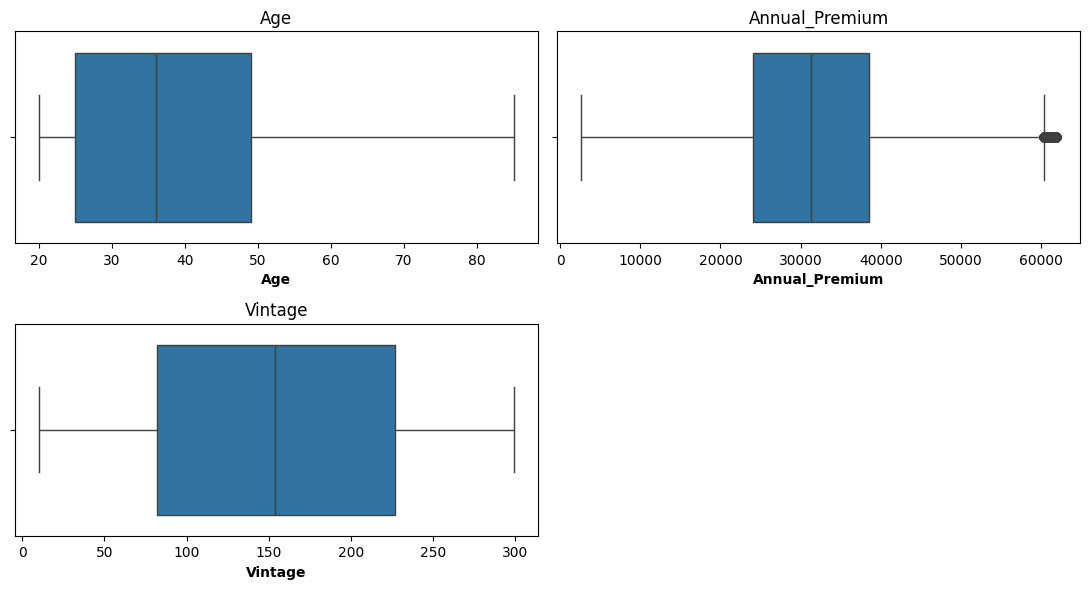

In [10]:
plt.figure(figsize=(11, 6))
for i in range(len(nums)):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x = nums[i], data=df)
    plt.xlabel(nums[i], fontsize=10, fontweight = 'bold')
    plt.title(f'{nums[i]}')
    plt.tight_layout()

**As can be seen above, the extreme outliers have been trimmed.**

## **Removing Unnecessary Identifer Column**

In [11]:
df.drop(columns='id', inplace=True)

## **Feature Encoding**

In [12]:
# Label encoding Gender feature
df['Gender'] = np.where(df['Gender'] == 'Male', 1, 0)
df['Gender'].value_counts()

Gender
1    200319
0    170470
Name: count, dtype: int64

In [13]:
# Label encoding Vehicle_Damage feature
df['Vehicle_Damage'] = np.where(df['Vehicle_Damage'] == 'Yes', 1, 0)
df['Vehicle_Damage'].value_counts()

Vehicle_Damage
1    186561
0    184228
Name: count, dtype: int64

In [14]:
# Label encoding Ordinal Vehicle_Age feature
df['Vehicle_Age'] = np.where(df['Vehicle_Age'] == '> 2 Years', 3, np.where(df['Vehicle_Age'] == '1-2 Year', 2, 1 ))
df['Vehicle_Age'].value_counts()

Vehicle_Age
2    194212
1    161547
3     15030
Name: count, dtype: int64

In [15]:
pd.set_option('display.max_columns', None)

In [16]:
# One hot encoding
cols = ['Region_Code', 'Policy_Sales_Channel']

for col in cols:
    onehots = pd.get_dummies(df[col], prefix=col, prefix_sep=' ')
    onehots = onehots.astype(int)
    df = df.join(onehots)

df = df.drop(columns = ['Region_Code', 'Policy_Sales_Channel'])
df.head(3)

,Gender,Age,Driving_License,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Vintage,Response,Region_Code 0,Region_Code 1,Region_Code 2,Region_Code 3,Region_Code 4,Region_Code 5,Region_Code 6,Region_Code 7,Region_Code 8,Region_Code 9,Region_Code 10,Region_Code 11,Region_Code 12,Region_Code 13,Region_Code 14,Region_Code 15,Region_Code 16,Region_Code 17,Region_Code 18,Region_Code 19,Region_Code 20,Region_Code 21,Region_Code 22,Region_Code 23,Region_Code 24,Region_Code 25,Region_Code 26,Region_Code 27,Region_Code 28,Region_Code 29,Region_Code 30,Region_Code 31,Region_Code 32,Region_Code 33,Region_Code 34,Region_Code 35,Region_Code 36,Region_Code 37,Region_Code 38,Region_Code 39,Region_Code 40,Region_Code 41,Region_Code 42,Region_Code 43,Region_Code 44,Region_Code 45,Region_Code 46,Region_Code 47,Region_Code 48,Region_Code 49,Region_Code 50,Region_Code 51,Region_Code 52,Policy_Sales_Channel 1,Policy_Sales_Channel 2,Policy_Sales_Channel 3,Policy_Sales_Channel 4,Policy_Sales_Channel 6,Policy_Sales_Channel 7,Policy_Sales_Channel 8,Policy_Sales_Channel 9,Policy_Sales_Channel 10,Policy_Sales_Channel 11,Policy_Sales_Channel 12,Policy_Sales_Channel 13,Policy_Sales_Channel 14,Policy_Sales_Channel 15,Policy_Sales_Channel 16,Policy_Sales_Channel 17,Policy_Sales_Channel 18,Policy_Sales_Channel 19,Policy_Sales_Channel 20,Policy_Sales_Channel 21,Policy_Sales_Channel 22,Policy_Sales_Channel 23,Policy_Sales_Channel 24,Policy_Sales_Channel 25,Policy_Sales_Channel 26,Policy_Sales_Channel 27,Policy_Sales_Channel 28,Policy_Sales_Channel 29,Policy_Sales_Channel 30,Policy_Sales_Channel 31,Policy_Sales_Channel 32,Policy_Sales_Channel 33,Policy_Sales_Channel 34,Policy_Sales_Channel 35,Policy_Sales_Channel 36,Policy_Sales_Channel 37,Policy_Sales_Channel 38,Policy_Sales_Channel 39,Policy_Sales_Channel 40,Policy_Sales_Channel 41,Policy_Sales_Channel 42,Policy_Sales_Channel 43,Policy_Sales_Channel 44,Policy_Sales_Channel 45,Policy_Sales_Channel 46,Policy_Sales_Channel 47,Policy_Sales_Channel 48,Policy_Sales_Channel 49,Policy_Sales_Channel 50,Policy_Sales_Channel 51,Policy_Sales_Channel 52,Policy_Sales_Channel 53,Policy_Sales_Channel 54,Policy_Sales_Channel 55,Policy_Sales_Channel 56,Policy_Sales_Channel 57,Policy_Sales_Channel 58,Policy_Sales_Channel 59,Policy_Sales_Channel 60,Policy_Sales_Channel 61,Policy_Sales_Channel 62,Policy_Sales_Channel 63,Policy_Sales_Channel 64,Policy_Sales_Channel 65,Policy_Sales_Channel 66,Policy_Sales_Channel 67,Policy_Sales_Channel 68,Policy_Sales_Channel 69,Policy_Sales_Channel 70,Policy_Sales_Channel 71,Policy_Sales_Channel 73,Policy_Sales_Channel 74,Policy_Sales_Channel 75,Policy_Sales_Channel 76,Policy_Sales_Channel 78,Policy_Sales_Channel 79,Policy_Sales_Channel 80,Policy_Sales_Channel 81,Policy_Sales_Channel 82,Policy_Sales_Channel 83,Policy_Sales_Channel 84,Policy_Sales_Channel 86,Policy_Sales_Channel 87,Policy_Sales_Channel 88,Policy_Sales_Channel 89,Policy_Sales_Channel 90,Policy_Sales_Channel 91,Policy_Sales_Channel 92,Policy_Sales_Channel 93,Policy_Sales_Channel 94,Policy_Sales_Channel 95,Policy_Sales_Channel 96,Policy_Sales_Channel 97,Policy_Sales_Channel 98,Policy_Sales_Channel 99,Policy_Sales_Channel 100,Policy_Sales_Channel 101,Policy_Sales_Channel 102,Policy_Sales_Channel 103,Policy_Sales_Channel 104,Policy_Sales_Channel 105,Policy_Sales_Channel 106,Policy_Sales_Channel 107,Policy_Sales_Channel 108,Policy_Sales_Channel 109,Policy_Sales_Channel 110,Policy_Sales_Channel 111,Policy_Sales_Channel 112,Policy_Sales_Channel 113,Policy_Sales_Channel 114,Policy_Sales_Channel 115,Policy_Sales_Channel 116,Policy_Sales_Channel 117,Policy_Sales_Channel 118,Policy_Sales_Channel 119,Policy_Sales_Channel 120,Policy_Sales_Channel 121,Policy_Sales_Channel 122,Policy_Sales_Channel 123,Policy_Sales_Channel 124,Policy_Sales_Channel 125,Policy_Sales_Channel 126,Policy_Sales_Channel 127,Policy_Sales_Channel 128,Policy_Sales_Channel 129,Policy_Sales_Channel 130,Policy_Sales_Channel 131,Policy_Sales_Channel 132,Policy_Sales

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 370789 entries, 0 to 381108
Columns: 217 entries, Gender to Policy_Sales_Channel 163
dtypes: int64(217)
memory usage: 624.8 MB


# **Splitting the dataset**

In [18]:
X = df.drop(columns='Response')
y = df['Response'].values

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print(f'Train set size: {X_train.shape[0]}')
print(f'Test set size: {X_test.shape[0]}')

Train set size: 278091
Test set size: 92698


## **Scaling Numerical Features**

In [20]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
Xtrain_scaled = X_train.copy()

for n in nums:
  scaler = ss.fit(X_train[[n]])
  Xtrain_scaled[n] = scaler.transform(X_train[[n]])
  X_test[n] = scaler.transform(X_test[[n]])


In [21]:
# Checking Scaling Results
X_train[nums].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,278091.0,38.675261,15.445081,20.0,25.0,36.0,49.0,85.0
Annual_Premium,278091.0,29297.866576,14732.007317,2630.0,24118.0,31341.0,38631.0,61892.0
Vintage,278091.0,154.320330,83.649845,10.0,82.0,154.0,227.0,299.0


## **Handling Target Imbalance**

In [22]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(sampling_strategy=0.65, random_state=402)
Xtrain_under, ytrain_under = rus.fit_resample(Xtrain_scaled, y_train)

print('RUS')
print(pd.Series(ytrain_under).value_counts())

RUS
0    52066
1    33843
Name: count, dtype: int64


In [23]:
Xtrain_under[nums].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,85909.0,0.090347,0.948476,-1.209142,-0.820668,0.085771,0.733228,2.999325
Annual_Premium,85909.0,0.014015,1.017094,-1.810202,-0.344547,0.159254,0.665975,2.211999
Vintage,85909.0,-0.001782,1.000439,-1.725294,-0.864562,-0.003829,0.856903,1.729590


# **Modeling**

In [43]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from imblearn.pipeline import Pipeline
import time

def eval_classification(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(Xtrain_scaled)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(Xtrain_scaled)

    model1 = Pipeline([
        ('sampling', RandomUnderSampler(sampling_strategy=1, random_state=402)),
        ('scaling', StandardScaler()),
        ('classification', model)
    ])

    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Accuracy (Train Set): %.2f" % accuracy_score(y_train, y_pred_train))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred, zero_division=0))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("Recall (Train Set): %.2f" % recall_score(y_train, y_pred_train))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))

    print("roc_auc (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    print("roc_auc (train-proba): %.2f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))

    cv = RepeatedStratifiedKFold(random_state=42, n_repeats = 3)
    score = cross_validate(model1, X=X_train, y=y_train, cv=cv, scoring='roc_auc', return_train_score=True)
    print('ROC AUC (crossval train): '+ str(score['train_score'].mean()))
    print('ROC AUC (crossval test): '+ str(score['test_score'].mean()))


def grid_pipe(pipedict, hyperdict, scoring='accuracy', display=True):
    fitted_models1={}
    fit_time1 = []
    for name, pipeline in pipedict.items():
    # Construct grid search
        cv = RepeatedStratifiedKFold(random_state=42, n_repeats = 3)
        model = GridSearchCV(estimator=pipeline,
                             param_grid=hyperdict[name],
                             scoring=scoring,
                             cv=cv, verbose=2, n_jobs=-1, return_train_score = True, error_score='raise')

        # Fit using grid search
        start = time.time()
        model.fit(X_train, y_train)
        end = time.time()
        fit_time1.append(round(end-start, 2))
        #Append model
        fitted_models1[name]=model
        if display:
            #Print when the model has been fitted
            print(f'The {name} model has been fitted.')
            # print fit time
            print('Total Fit Time: %.3fs' % (end-start))
            # Best accuracy
            print('Best accuracy: %.3f' % model.best_score_)
            # Best params
            print('Best params:\n', model.best_params_,'\n')

    return fitted_models1, fit_time1

def confusion(model):
    y_pred_proba = model.predict_proba(X_test)
    y_predict = model.predict(X_test)
    print('Accuracy: %.2f%%' % (accuracy_score(y_test, y_predict) * 100 ))
    print('Precision: %.2f%%' % (precision_score(y_test, y_predict, zero_division=0) * 100))
    print('Recall: %.2f%%' % (recall_score(y_test, y_predict) * 100))
    print('F1_Score: %.2f%%' % (f1_score(y_test, y_predict) * 100))
    print('ROC_AUC: %.2f%%' % (roc_auc_score(y_test, y_pred_proba[:,1]) * 100))
    confusion_matrix_model = confusion_matrix(y_test, y_predict)
    plt.figure(figsize=(12,8))
    ax = plt.subplot()
    sns.heatmap(confusion_matrix_model, annot=True, fmt='g', ax = ax)
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('Actual Label')
    ax.set_title(f'Confusion Matrix - {model}')
    ax.xaxis.set_ticklabels(['0','1'])
    ax.yaxis.set_ticklabels(['0','1'])

## **Logistic Regression**

In [48]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=123, max_iter=1000, class_weight={1:0.37, 0:0.63}, C = 0.1)
logreg.fit(Xtrain_under, ytrain_under)

eval_classification(logreg)

Accuracy (Test Set): 0.80
Accuracy (Train Set): 0.80
Precision (Test Set): 0.33
Recall (Test Set): 0.62
Recall (Train Set): 0.63
F1-Score (Test Set): 0.43
roc_auc (test-proba): 0.85
roc_auc (train-proba): 0.85
ROC AUC (crossval train): 0.8502211663225085
ROC AUC (crossval test): 0.8488208766398878


Accuracy: 80.14%
Precision: 33.28%
Recall: 62.46%
F1_Score: 43.42%
ROC_AUC: 84.85%


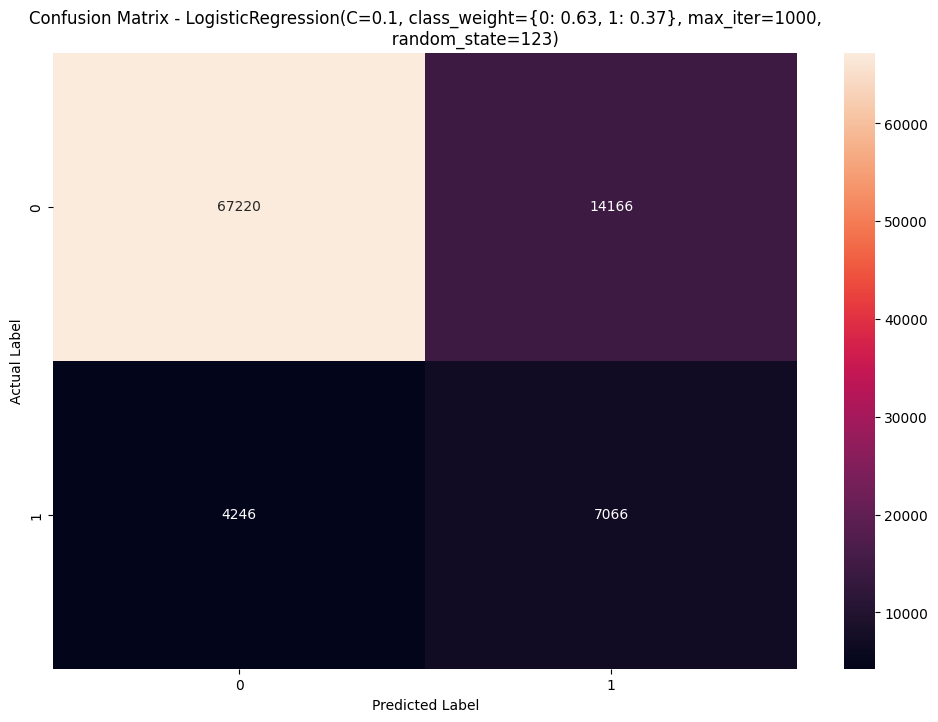

In [49]:
confusion(logreg)

## **Random Forest**

In [56]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=123, criterion = 'gini', max_features = 'sqrt', n_estimators=100)
rf.fit(Xtrain_under, ytrain_under)

eval_classification(rf)

Accuracy (Test Set): 0.76
Accuracy (Train Set): 0.83
Precision (Test Set): 0.30
Recall (Test Set): 0.75
Recall (Train Set): 1.00
F1-Score (Test Set): 0.43
roc_auc (test-proba): 0.84
roc_auc (train-proba): 0.97
ROC AUC (crossval train): 0.9619010362902968
ROC AUC (crossval test): 0.8383872279522656


Accuracy: 75.55%
Precision: 30.01%
Recall: 75.33%
F1_Score: 42.92%
ROC_AUC: 83.95%


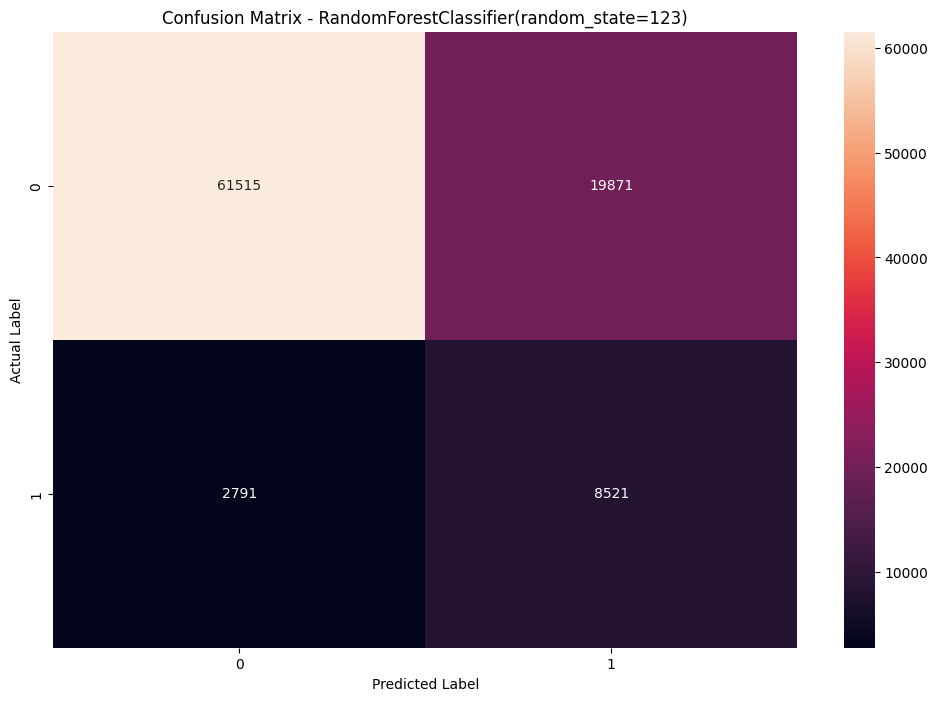

In [57]:
confusion(rf)

## **XGBOOST**

In [44]:
from xgboost import XGBClassifier
xgb = XGBClassifier(nthread=6, tree_method='hist', random_state=123, scale_pos_weight = 0.6, eta = 0.3)

xgb.fit(Xtrain_under, ytrain_under)

eval_classification(xgb)

Accuracy (Test Set): 0.80
Accuracy (Train Set): 0.81
Precision (Test Set): 0.33
Recall (Test Set): 0.67
Recall (Train Set): 0.72
F1-Score (Test Set): 0.45
roc_auc (test-proba): 0.85
roc_auc (train-proba): 0.87
ROC AUC (crossval train): 0.8696792020371705
ROC AUC (crossval test): 0.8525561685471831


Accuracy: 79.69%
Precision: 33.44%
Recall: 67.14%
F1_Score: 44.65%
ROC_AUC: 85.36%


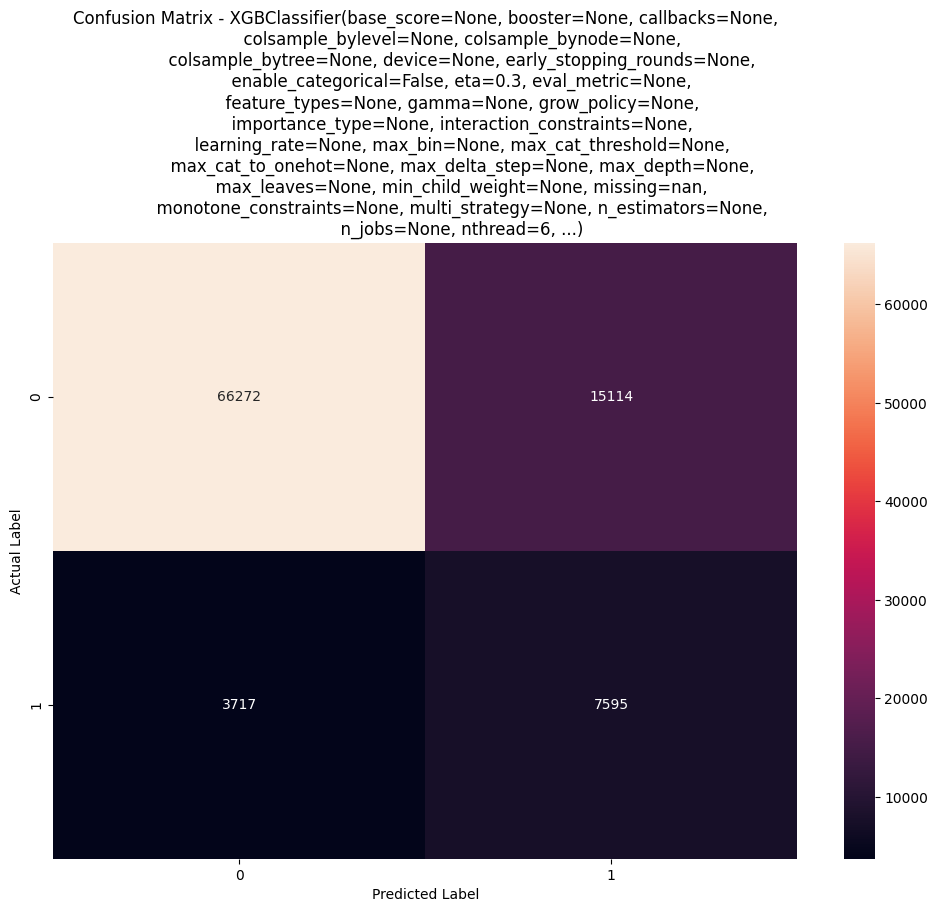

In [52]:
confusion(xgb)

**It can be seen that the XGBoost model has a slightly better ROC AUC with little to no Overfitting and therfore is slightly better than the other algorithms. The model chosen is therefore XGBoost.**

## **Import Model to Pickle**

In [58]:
import pickle

In [59]:
# Save the model to a file
with open('model.pkl', 'wb') as file:
    pickle.dump(xgb, file)

In [60]:
from google.colab import files

# Download the model.pkl file
files.download('model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>